## Method 1: Normal equation
Not the best way to use when there're a lot of features
The example below just have 2 features: $w_0$ and $w_1$

(1000, 2) (1000, 1)


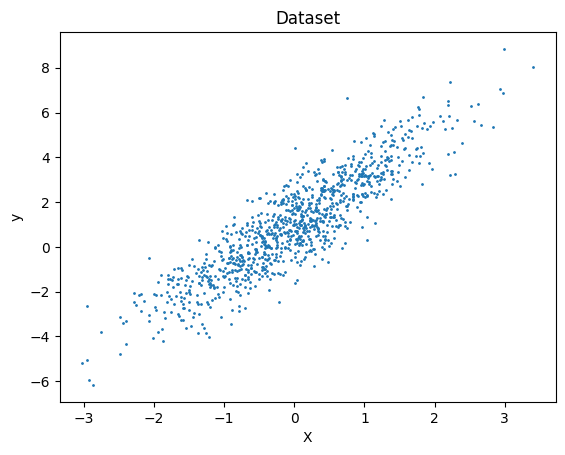

(1000, 2) (1000, 1)


In [14]:
import numpy as np
import matplotlib.pyplot as plt


_X = np.random.randn(1000, 1) # standard normal distribution, we pass the parameters

# X = [[1.0, -0.21], [1.0,  0.85], [1.0, -1.33], ...]
X = np.concatenate([np.ones_like(_X), _X], axis=-1) # add bias w_0
print(X.shape, _X.shape)

# y = 2x + 1 + noise
y = _X * 2 + 1 + np.random.randn(*_X.shape) # * for unpacking

plt.scatter(_X, y, s=1)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Dataset')
plt.show()
print(X.shape, y.shape)

In [15]:
def eval (X, y, w):
    return np.square(X @ w - y).mean()  # MSE   

def plot(_X, y, w):
    plt.scatter(_X,y, s=1)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Dataset')
    x_test = np.linspace(-3, 3, 10)[..., None]
    x_test_pad = np.concatenate([np.ones_like(x_test), x_test], axis=-1)
    y_test = x_test_pad @ w
    plt.plot(x_test, y_test, c='red')
    plt.show()

We can directly solve for the best linear function that best fit the data under the Mean Square error metric
$$w^* = \text{argmin}_{w}\frac{1}{2}\|Xw - y\|_2^2$$
differentiate wrt w and set it to 0
\begin{align}
0 &= X^T(Xw^*-y)\\
w^* &= (X^TX)^{-1}X^Ty
\end{align}

[[1.0326689 ]
 [1.98020982]]


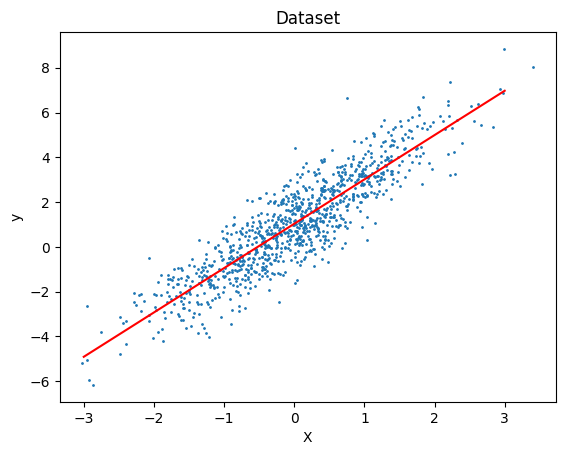

optimal loss: 0.9924524336350972


In [16]:
w_star = np.linalg.inv(X.T @ X) @ X.T @ y
print(w_star)
plot(_X, y, w_star)
print("optimal loss:", eval(X, y, w_star))

## Method 2: Gradient descent

Gradient:
$$
\nabla_w L =  X^T (Xw - y)
$$

Update weights
$$
w \leftarrow w - \eta \, X^T (Xw - y)
$$


final loss: 0.992452433635097


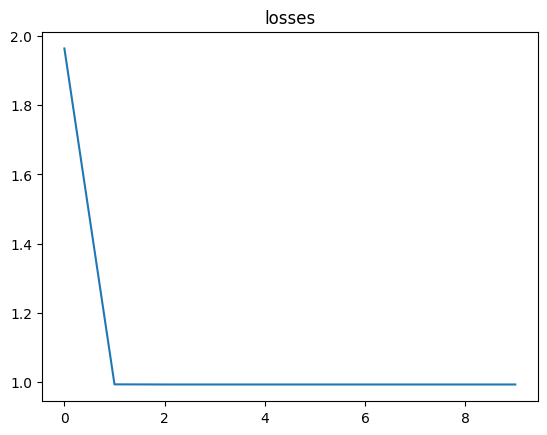

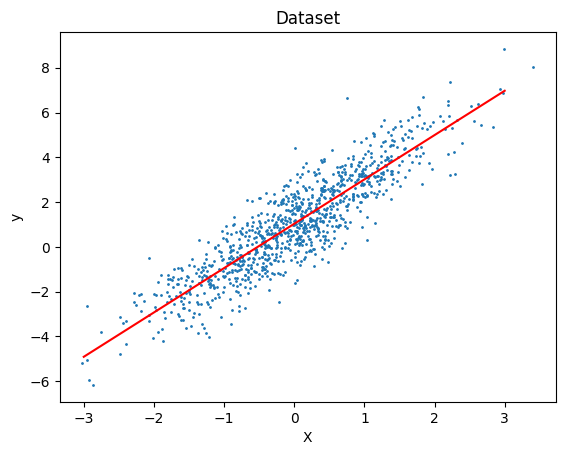

In [17]:
lr = 1e-3
epoch = 10
losses = []

# init @ with all ones
# ones_like and ones -.-
current_w = np.ones((X.shape[-1], 1))

for _ in range(epoch):
    losses.append(eval(X, y, current_w))
    grad = X.T @ (X @ current_w - y)
    current_w -= lr * grad

print("final loss:", eval(X, y, current_w))
plt.plot(losses)
plt.title("losses")
plt.show()
plot(_X, y, current_w)


From the first chart, we can see that the loss is almost the same as the optimal loss just after one epoch. Now we will examine with the minibatch stochastic gradient descent algorithm

final loss: 1.007841597842532


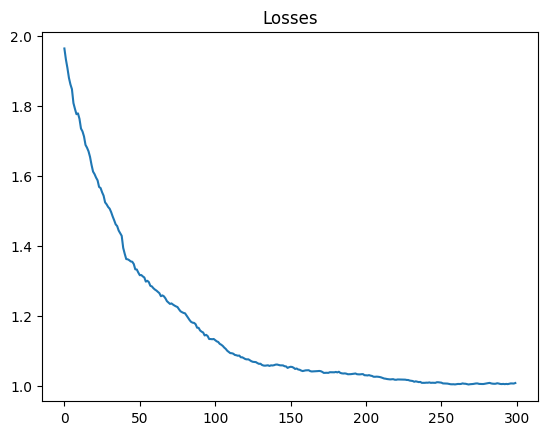

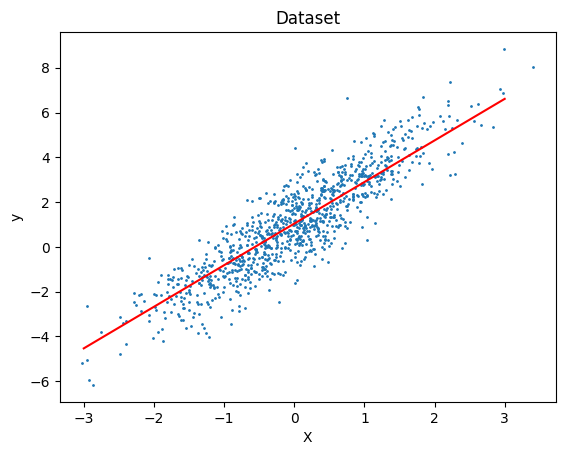

In [18]:
# i tried , but again if don't remember the shape of any matrix, just print it
# especially with the X[indx]
# also must know the differnt between the shape of (d, 1) and (d, )

lr = 1e-3
epoch = 300
batch = 10

losses = []

current_w = np.ones((X.shape[-1], 1)) 

for _ in range(epoch):
    index = np.random.choice(X.shape[0], batch)
    X_batch = X[index]
    y_batch = y[index]
    losses.append(eval(X, y, current_w))
    grad = X_batch.T @ (X_batch @ current_w - y_batch)
    current_w -= lr * grad


print("final loss:", eval(X, y, current_w))
plt.plot(losses)
plt.title("Losses")
plt.show()
plot(_X, y, current_w)

## Using library
This section illustrates the use of sklearn library to solve the linear regression problem.

Score: 0.7997734310696076
Loss: 0.992452433635097


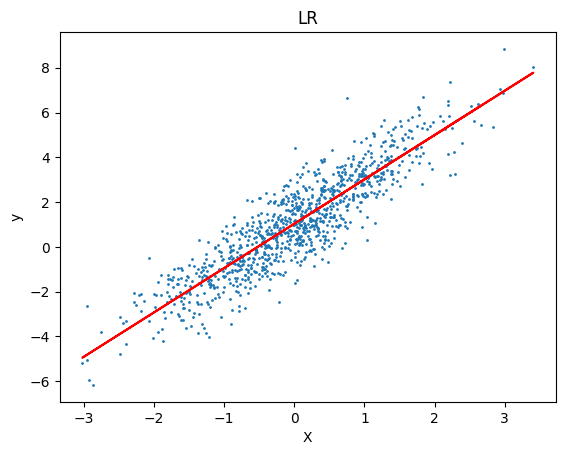

In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(_X, y)
y_pred = reg.predict(_X)
print("Score:", reg.score(_X, y)) # coefficient of determination: R^2
print("Loss:", ((y_pred - y)**2).mean())

plt.scatter(_X, y, s=1)
plt.xlabel('X')
plt.ylabel('y')
plt.title('LR')
plt.plot(_X, y_pred, c='red')
plt.show()

We can also use the seaborn library, it will fit the linear model for us and plot at the same time, we don't have the separte the linear regression and the plot (but just for 1D visualization only)

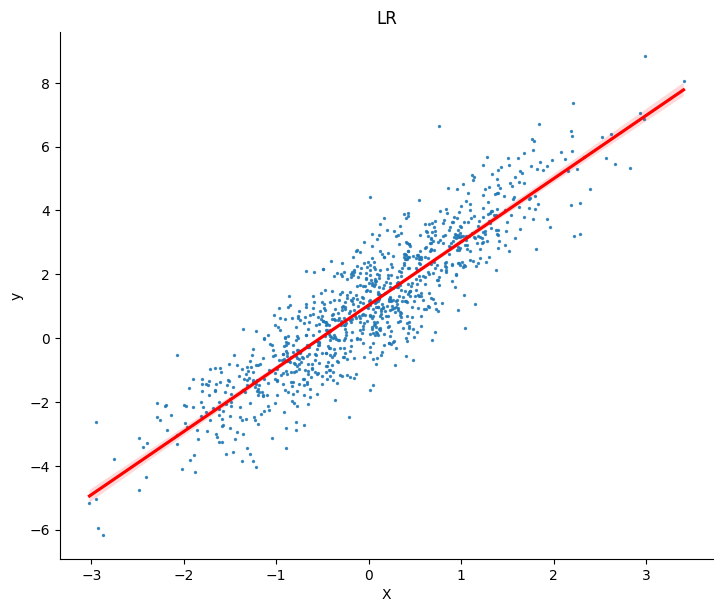

In [20]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(np.concatenate([_X, y], axis=-1), columns=['X', 'y'])

sns.lmplot(x='X', y='y', data=df,
            aspect=2,height=6, scatter_kws={"s":2},
    line_kws={"color":"red"})

plt.gcf().set_figwidth((7))
plt.xlabel('X')
plt.ylabel('y')
plt.title('LR');

## Using on actual dataset

In [21]:
# I may have to take a course learning to code with sklearn and pandas :/
from sklearn.datasets import fetch_california_housing
import pandas as pd

# y = Each value corresponds to the average house value in units of 100,000
# X = Each row corresponding to the 8 feature values in order
X, y = fetch_california_housing(data_home="/content/sample_data", return_X_y=True, as_frame=True)
df = pd.read_csv("california_housing_train.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800


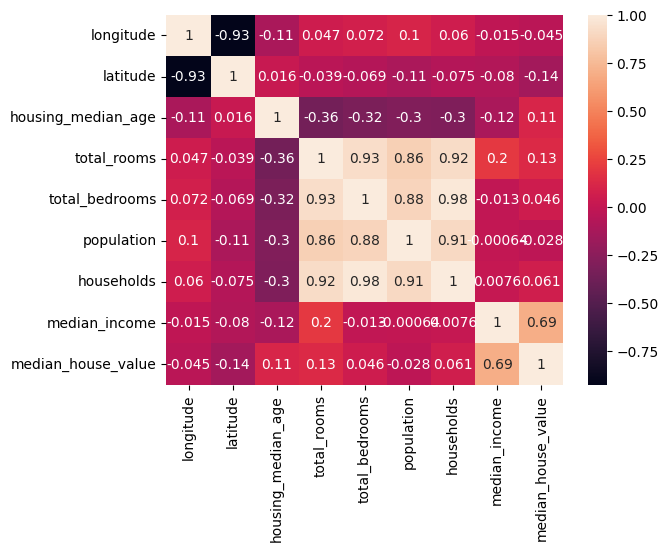

In [22]:
sns.heatmap(df.corr(), annot= True);

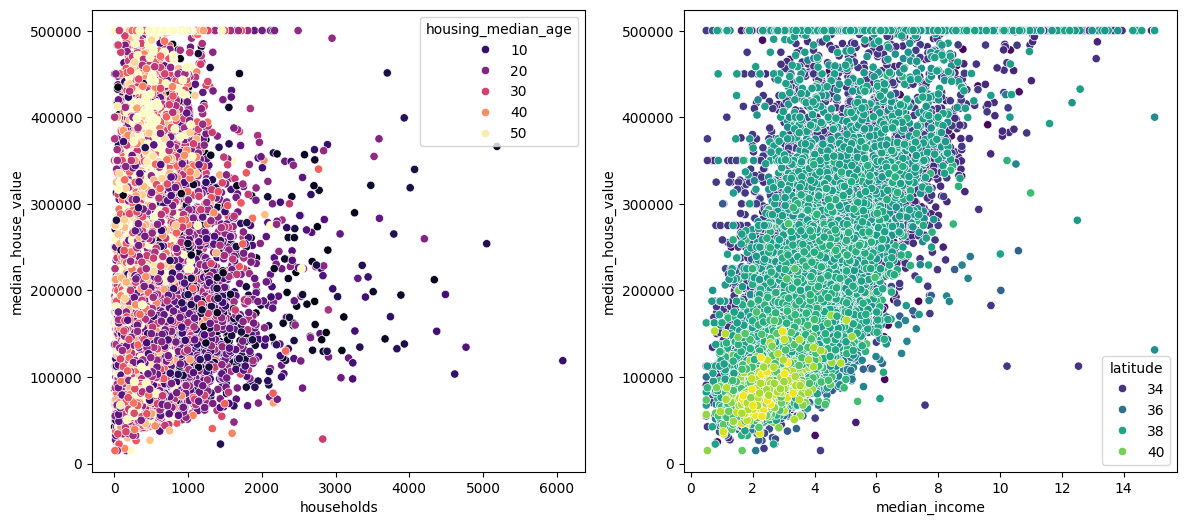

In [23]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='households',y='median_house_value',data=df,palette='magma',hue='housing_median_age',ax=ax)

ax = f.add_subplot(122)
sns.scatterplot(x='median_income',y='median_house_value',data=df,palette='viridis',hue='latitude')
plt.savefig('sc.png');

We will try the linear regresison equation here: $w^* = (X^T X)^{-1} X^Ty$ and also use the sklearn library

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# print(X_train.shape)
X_train_pad = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=-1)
X_test_pad = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=-1)

# 1. Using linear regression equaiton
w_star = np.linalg.inv(X_train_pad.T @ X_train_pad) @ X_train_pad.T @ y_train

# 2. Using library
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) # remember: no need to pad when using library

#Parameter
parameter = ['w_'+str(i) for i in range(X_train_pad.shape[1])] # w_0 -> w_8
columns = ['Bias:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'analytic w^*':w_star})

# intercept_ is w_0, coef_ is w1, ...
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_) 
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_w'))
parameter_df



,Parameter,Columns,analytic w^*,Sklearn_w
0,w_0,Bias:x_0=1,-37.285329,-37.285329
1,w_1,MedInc,0.441038,0.441038
2,w_2,HouseAge,0.009688,0.009688
3,w_3,AveRooms,-0.104781,-0.104781
4,w_4,AveBedrms,0.622053,0.622053
5,w_5,Population,-0.000006,-0.000006
6,w_6,AveOccup,-0.003288,-0.003288
7,w_7,Latitude,-0.423182,-0.423182
8,w_8,Longitude,-0.437899,-0.437899


In [27]:
print("w^* train loss:", eval(X_train_pad, y_train, w_star))
print("w^* test loss:", eval(X_test_pad, y_test, w_star))
print("="*20)

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

print("Sklearn train loss:", np.square(y_train - y_pred_train).mean())
print("Sklearn test loss:", np.square(y_test - y_pred_test).mean())

w^* train loss: 0.5224237652246315
w^* test loss: 0.5296293151416858
Sklearn train loss: 0.5224237652246315
Sklearn test loss: 0.5296293151408235


## Advanced: L2 norm regularization for linear regression (ridge regression)

We add a penalty term to the weights of the linear layer to encourage the model to take small values (Oscam razor - simpler model is better)
$$w^* = \text{argmin}_{w}\|Xw - y\|_2^2 + \alpha \|w\|^2_2$$
differentiate w.r.t. w and set it to 0
\begin{align}
0 &= X^T(Xw^*-y)+\alpha w^*\\
w^* &=(X^TX+\alpha I)^{-1}X^Ty
\end{align}
Unlike the case with vanilla linear regression, the above matrix is always a positive matrix, so it is invertable even when the data matrix is deficient.

In [31]:
X_train_pad.shape

(14448, 9)

In [39]:
alpha = 10

w_star = np.linalg.inv(X_train_pad.T @ X_train_pad + 
                       alpha * np.eye(X_train_pad.shape[1])
                       ) @ X_train_pad.T @ y_train

print("w^* train loss:", eval(X_train_pad, y_train, w_star))
print("w^* train loss:", eval(X_test_pad, y_test, w_star))
print("="*20)

from sklearn.linear_model import Ridge
clf = Ridge(alpha=alpha)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print("Sklearn train loss:", np.square(y_train - y_pred_train).mean())
print("Sklearn test loss:", np.square(y_test - y_pred_test).mean())

parameter = ['w_'+str(i) for i in range(X_train_pad.shape[1])]
columns = ['Bias:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'analytic w^*':w_star})

sk_theta = [clf.intercept_]+list(clf.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_w'))
parameter_df


w^* train loss: 0.591471966384221
w^* train loss: 0.5948945095725029
Sklearn train loss: 0.5224298969177953
Sklearn test loss: 0.52967106119746


,Parameter,Columns,analytic w^*,Sklearn_w
0,w_0,Bias:x_0=1,-2.906152,-37.234545
1,w_1,MedInc,0.511341,0.439754
2,w_2,HouseAge,0.015573,0.009712
3,w_3,AveRooms,-0.170252,-0.102346
4,w_4,AveBedrms,0.809819,0.609382
5,w_5,Population,0.000005,-0.000006
6,w_6,AveOccup,-0.004103,-0.003285
7,w_7,Latitude,-0.090249,-0.422901
8,w_8,Longitude,-0.048657,-0.437431


The difference between the solution of SKlearn and the derived analytic solution is that the bias term (also called intercept) in sklearn is not included in the l2 regularization. By switching the use of this bias term off, two solutions should be the same.

By default, sklearn will set the fit_intercept=True, which mean bias will be added by sklearn and it will not be regularized.
By setting fit_intercept=False, we can add bias by ourself and it will be regularized (of course we won't add it when using sklearn)


In [44]:
alpha = 10

try:
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
except:
    pass


w_star = np.linalg.inv(X_train.T @ X_train + 
                       alpha * np.eye(X_train.shape[1])
                       ) @ X_train.T @ y_train

print("w^* train loss:", eval(X_train, y_train, w_star))
print("w^* train loss:", eval(X_test, y_test, w_star))
print("="*20)

from sklearn.linear_model import Ridge
clf = Ridge(alpha=alpha, fit_intercept=False)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print("Sklearn train loss:", np.square(y_train - y_pred_train).mean())
print("Sklearn test loss:", np.square(y_test - y_pred_test).mean())

parameter = ['w_'+str(i) for i in range(X_train.shape[1])]
columns = list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'analytic w^*':w_star})

sk_theta = list(clf.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_w'))
parameter_df


w^* train loss: 0.6036375423290395
w^* train loss: 0.6067888503277155
Sklearn train loss: 0.6036375423290389
Sklearn test loss: 0.6067888503277071


c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


,Parameter,Columns,analytic w^*,Sklearn_w
0,w_0,MedInc,0.517401,0.517401
1,w_1,HouseAge,0.016069,0.016069
2,w_2,AveRooms,-0.176001,-0.176001
3,w_3,AveBedrms,0.826788,0.826788
4,w_4,Population,0.000005,0.000005
5,w_5,AveOccup,-0.004173,-0.004173
6,w_6,Latitude,-0.062088,-0.062088
7,w_7,Longitude,-0.015744,-0.015744
